In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('merged_df.csv', index_col='Unnamed: 0')

In [3]:
def prep_store_data(df):
    df.sale_date = df.sale_date.apply(lambda date: date[:-13])
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
    # make sure we sort by date/time before resampling or doing other time series manipulations
    df = df.set_index('sale_date').sort_index()
    df = df.rename(columns={'sale_amount': 'quantity'})
    df['month'] = df.index.strftime('%m-%b')
    df['dow'] = df.index.strftime('%w-%a')
    df['sales_total'] = df.quantity * df.item_price
    return df

In [4]:
df = prep_store_data(df)

In [5]:
df.head()

,quantity,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,dow,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,01-Jan,2-Tue,10.92
2013-01-01,26.0,211817,7,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,01-Jan,2-Tue,218.40
2013-01-01,27.0,832657,7,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,01-Jan,2-Tue,125.55
2013-01-01,54.0,213643,8,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,8,TX,78232,01-Jan,2-Tue,453.60
2013-01-01,35.0,215469,9,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221,01-Jan,2-Tue,294.00


## 1)Using a human-based approach, split your dataset into train and test sets.
## 2) Visualize your train-test split.

In [9]:
# train_size = 0.70 # 70% train, 30% test
# n = df.shape[0]
# test_start_index = round(train_size * n)

# train = df[:test_start_index] # Everything up to but not including the test_start_index
# test = df[test_start_index:] # Everything from the test_start_index to the end

# plt.plot(train.index, train.quantity)
# plt.plot(test.index, test.quantity)

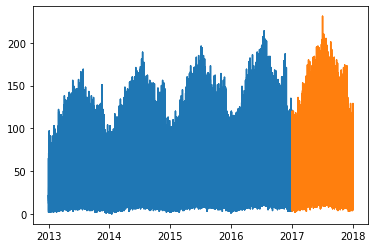

In [14]:
train = df[:'2016'] # includes 2016
test = df['2017'] 

plt.plot(train.index, train.quantity)
plt.plot(test.index, test.quantity)

3) Resample your data and visualize it.

In [16]:
y = train.quantity
y.head()

sale_date
2013-01-01    13.0
2013-01-01    26.0
2013-01-01    27.0
2013-01-01    54.0
2013-01-01    35.0
Name: quantity, dtype: float64

In [17]:
y.index

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2016-12-31', '2016-12-31', '2016-12-31', '2016-12-31',
               '2016-12-31', '2016-12-31', '2016-12-31', '2016-12-31',
               '2016-12-31', '2016-12-31'],
              dtype='datetime64[ns]', name='sale_date', length=730500, freq=None)

<AxesSubplot:title={'center':'Distribution of quantity'}, xlabel='quantity ', ylabel='Frequency'>

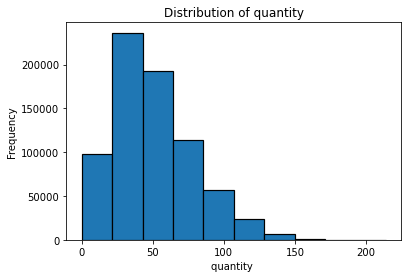

In [20]:
plt.title('Distribution of quantity')
plt.xlabel('quantity ')
y.plot.hist(linewidth=1.2, edgecolor='black')

<AxesSubplot:title={'center':'Quarterly average'}, xlabel='sale_date'>

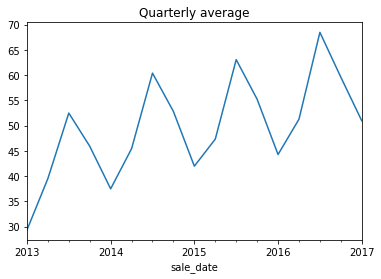

In [21]:
y.resample('3M').mean().plot(title='Quarterly average')

<AxesSubplot:title={'center':'Monthly average'}, xlabel='sale_date'>

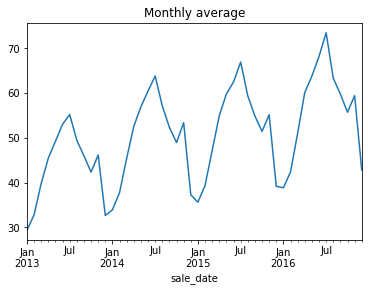

In [22]:
#resampling by month
y.resample('M').mean().plot(title='Monthly average')

In [23]:
y = y.resample('D').mean()
y.head()

sale_date
2013-01-01    27.392
2013-01-02    27.356
2013-01-03    28.976
2013-01-04    31.354
2013-01-05    32.474
Freq: D, Name: quantity, dtype: float64

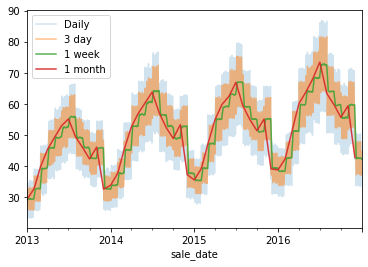

In [24]:
y.plot(alpha=.2, label='Daily')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
y.resample('M').mean().plot(alpha=.9, label='1 month')
plt.legend()

<AxesSubplot:xlabel='sale_date'>

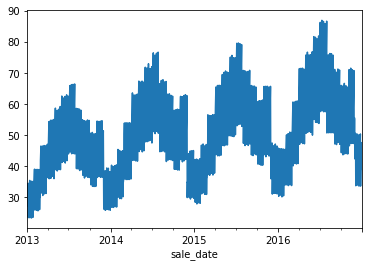

In [25]:
y.plot()

10) Visualize a seasonal decomposition plot on a weekly resampling.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

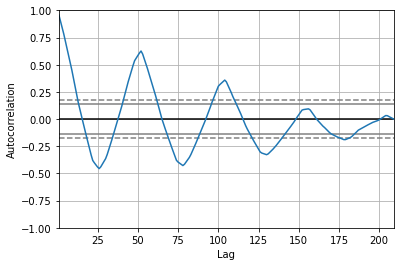

In [28]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())


# OLS Data

Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test.

In [36]:
df = pd.read_csv('power.csv', index_col='Unnamed: 0')

In [37]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [38]:
def prep_opsd_data(df):
    df.columns = [column.replace('+','_').lower() for column in df]
    df.date = pd.to_datetime(df.date)
    df = df.set_index('date').sort_index()
    df['month'] = df.index.strftime('%m-%b')
    df['year'] = df.index.year
    df = df.fillna(0)
    df['wind_solar'] = df.wind + df.solar
    return df

In [39]:
df2 = prep_opsd_data(df)

In [40]:
df2.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006
2006-01-02,1380.521,0.0,0.0,0.0,01-Jan,2006
2006-01-03,1442.533,0.0,0.0,0.0,01-Jan,2006
2006-01-04,1457.217,0.0,0.0,0.0,01-Jan,2006
2006-01-05,1477.131,0.0,0.0,0.0,01-Jan,2006


1) Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test.

In [48]:
train = df2[:'2013'] # includes 2016
test = df2['2013':] 



2)Visualize your train-test split.

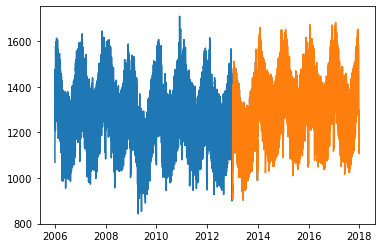

In [49]:
plt.plot(train.index, train.consumption)
plt.plot(test.index, test.consumption)

3) Plot the consumption, wind, and solar data on the same chart.

<AxesSubplot:xlabel='date'>

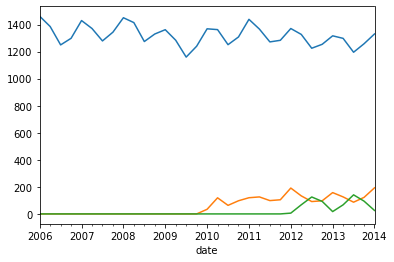

In [51]:
train.consumption.resample('3M').mean().plot()
train.wind.resample('3M').mean().plot()
train.solar.resample('3M').mean().plot()

4) Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.

In [53]:
twentyten = pd.DataFrame({
    'Consumption': train.consumption,
    '2010': train.consumption == '2010'
})
twentyten.head()

,Consumption,2010
date,,
2006-01-01,1069.184,False
2006-01-02,1380.521,False
2006-01-03,1442.533,False
2006-01-04,1457.217,False
2006-01-05,1477.131,False


In [54]:
usage = twentyten.rolling(window=3, center=True, win_type='triang').mean()


In [55]:
usage.name = 'Consumption'
usage['day'] = usage.index.dayofyear
usage['month'] = usage.index.month
usage['Year'] = usage.index.year

In [56]:
usage.head()

,Consumption,2010,day,month,Year
date,,,,,
2006-01-01,NaN,NaN,1,1,2006
2006-01-02,1318.18975,0.0,2,1,2006
2006-01-03,1430.70100,0.0,3,1,2006
2006-01-04,1458.52450,0.0,4,1,2006
2006-01-05,1453.72650,0.0,5,1,2006


<AxesSubplot:xlabel='month'>

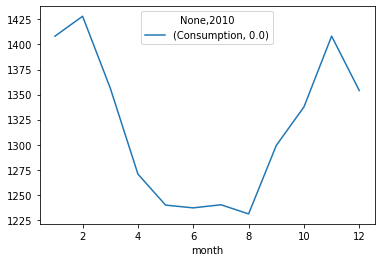

In [57]:
piv = pd.pivot_table(usage, index=['month'],columns=['2010'], values=['Consumption'], dropna=True, observed=True)
piv.plot()

In [63]:
# Resample the consumption data to monthly and plot it.

<AxesSubplot:xlabel='date'>

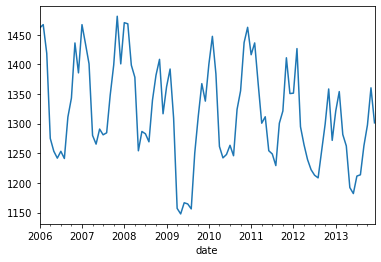

In [59]:
train.consumption.resample('M').mean().plot()

In [62]:
#Resample the consumption data to yearly and plot it.

<AxesSubplot:xlabel='date'>

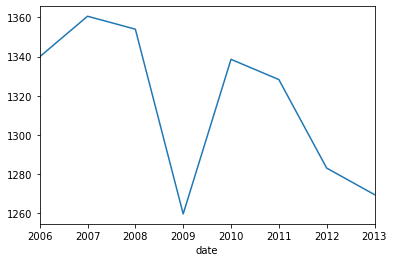

In [61]:

train.consumption.resample('Y').mean().plot()